<a href="https://colab.research.google.com/github/Sudarshinipilla/module1.lab1/blob/main/FMML_M2Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 1: Basic Plots


```
Coordinator: Aswin Jose
```

---

<!-- In this lab you will learn how to visualize a dataset and the various tools that can you help you do this. -->

It is often said **Data is only as good as it is presented**. Countless studies show how our brain is wired for the visual, and processes everything faster when it is through the eye. Therefore it becomes increasingly important to be able to APPRECIATE, INTERPRET and VISUALIZE data even before we start writing any form of code to process it.


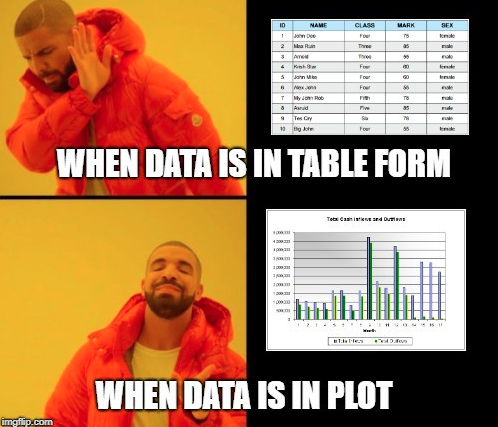

In this lab, you will learn simple ways to visualize your data using commonly-used libraries. Understanding the plots would further help in decoding the various features in the dataset and their impact on the target variables.

Data visualizations in Python can be done via many packages. We’ll be discussing first the *matplotlib* package which can be used in Python scripts, Jupyter notebook, and web application servers.

### **Matplotlib**

It is a 2-D plotting library that helps in visualizing figures. Matplotlib emulates Matlab like graphs and visualizations. Matlab is not free, is difficult to scale and as a programming language is tedious. So, matplotlib in Python is used as it is a robust, free and easy library for data visualization.

#### **Anatomy of a Matplotlib Figure**

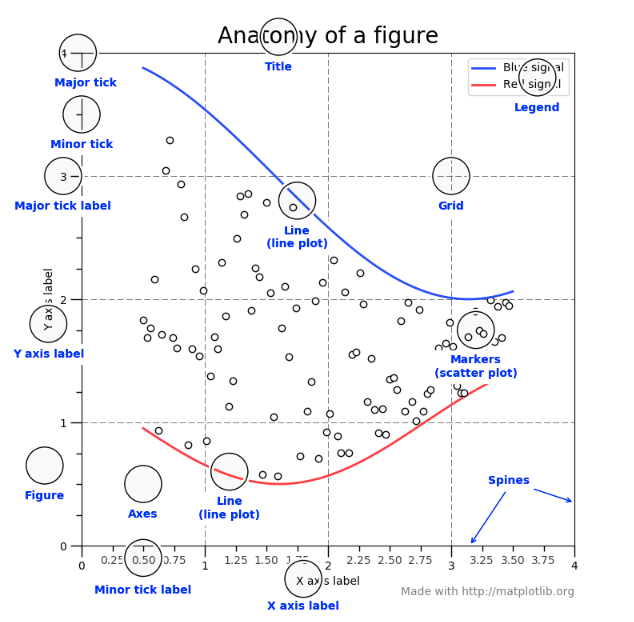

Let's start with a real dataset, the Automobile dataset from Kaggle (https://www.kaggle.com/toramky/automobile-dataset).

This dataset consists of data from 1985 Ward's Automotive Yearbook for some features relating to nearly 200 cars (e.g. the car maker, mileage, dimensions, etc.) and their prices.

In [1]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
# Removing rows which have missing values

data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

159


In [5]:
# Dividing the dataset into features (X) and the target variable (y)

X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])

To begin with let's see the plot for Car making company on the X-axis and the price of the car on the Y-axis.

To do this, we use matplotlib.pyplot's scatter() function to create a Scatter Plot for the same.

As far as Machine learning/Data Science is concerned, one of the most commonly used plot for simple data visualization is scatter plots. This plot gives us a representation of where each points in the entire dataset are present with respect to any 2/3 features (columns). Scatter plots are available in 2-D as well as 3D . The 2-D scatter plot is the important/common one, where we will primarily find patterns/clusters and separability of the data. The code snippet for using a scatter plot is as shown below.

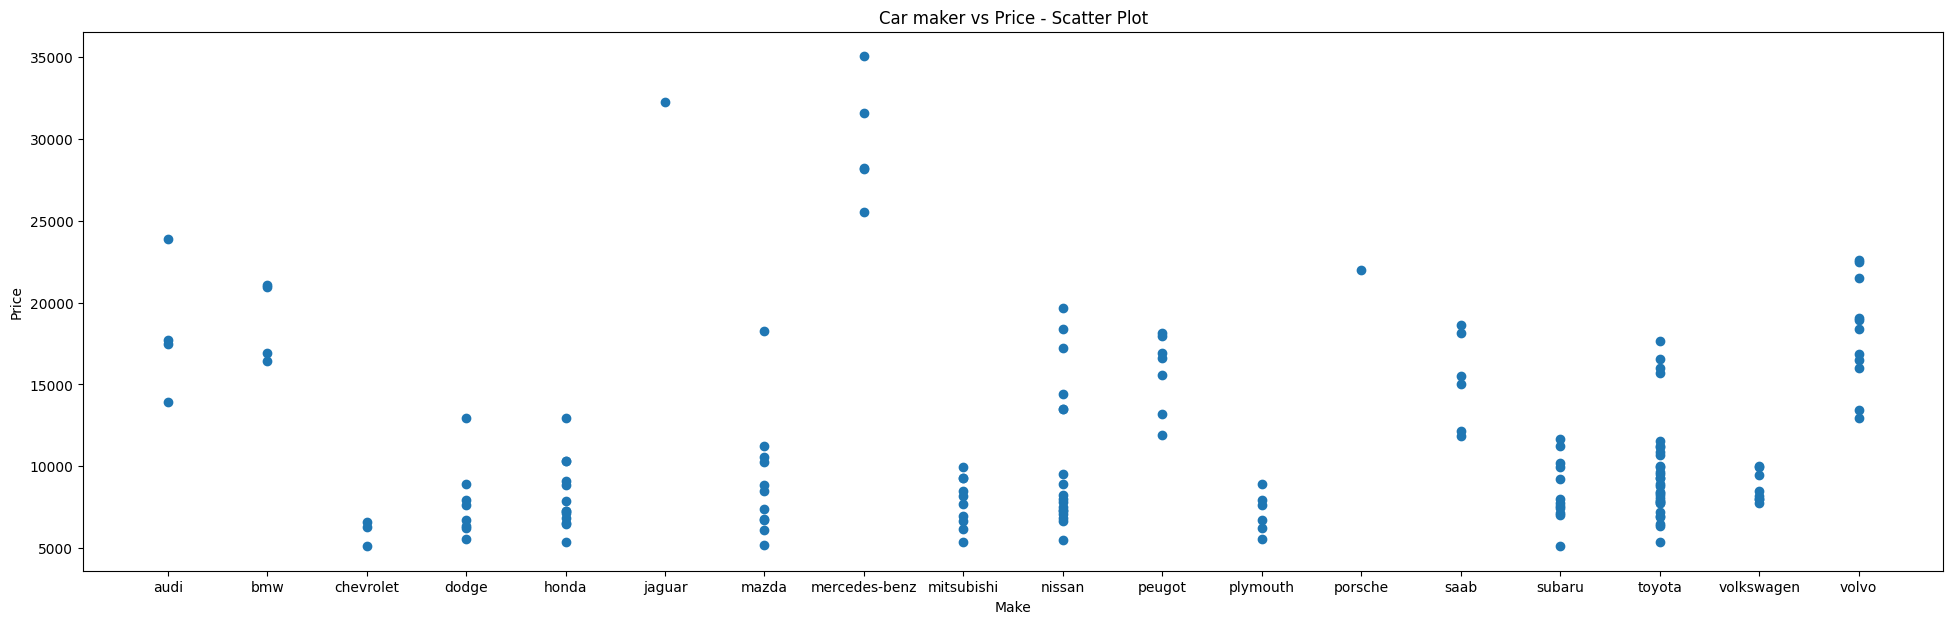

In [6]:
plt.figure(figsize = (24, 7))
plt.scatter(X["make"], y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

Even though the scatter plot clearly shows that some car makers like Mercedes-benz, Jaguar, Porsche and BMW keep their cars on the higher side of the price range. But is there a better way to understand the distribution of cars within these companies as well?

To do this, we will use the Seaborn package. Seaborn is a Python data visualization library based on matplotlib.

We will be creating a Box Plot. This is the type of plot that can be used to obtain more of the statistical details about the data. The straight lines at the maximum and minimum are also called as whiskers. Points outside of whiskers will be inferred as an outliers. The box plot gives us a representation of 25th, 50th ,75th quartiles. From a box plot we can also see the Interquartile range(IQR) where maximum details of the data will be present. It also gives us a clear overview of outlier points in the data.

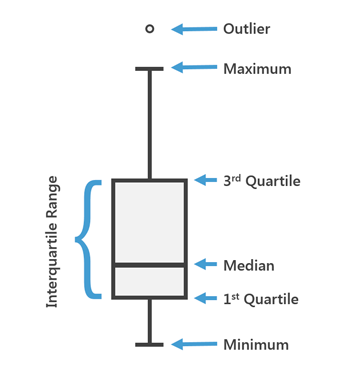

<ipython-input-7-0447ba8df549>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')


Text(0.5, 1.0, 'Car Manufacturer vs Price - Box Plot')

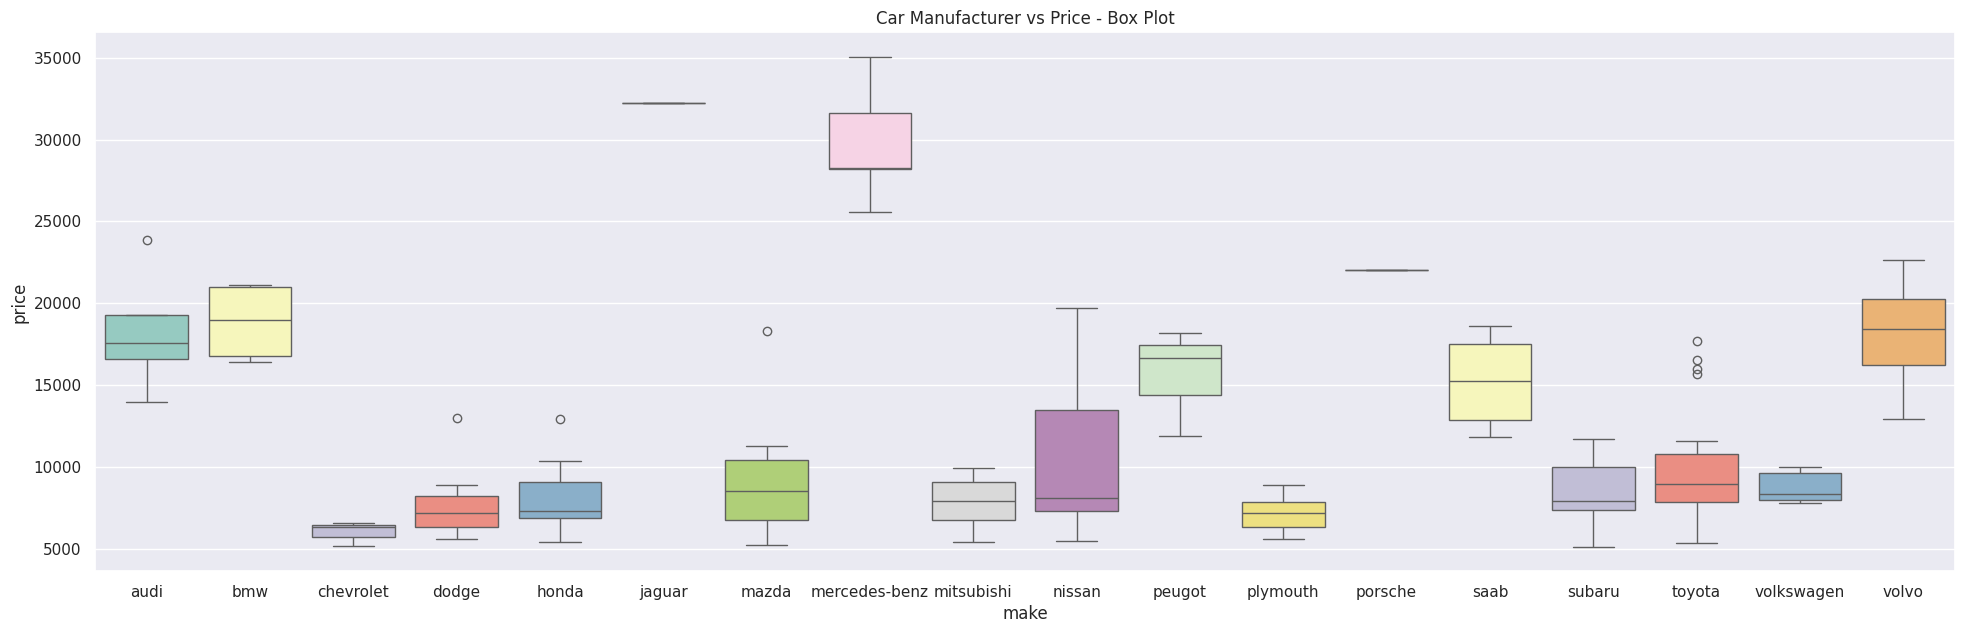

In [7]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')

It becomes evidently clear that Mercedes-Benz, Jaguar and Porsche have the costliest cars. BMW too has costly cars but the large interquartile range suggests that the company has a broader range of cars in the market. The outliers are also important as for example, Mazda has a car listed much higher than its normal price range.

All of these conclusions could be very hard to get to using the data in a tabular format, whereas it became evidently clear straight away once we used Visualization techniques to understand the dataset.

You can also use a Violin Plot to understand the distribution within each car maker in a better way. These violin plots can be inferred as a combination of Box plot at the middle and distribution plots (Kernel Density Estimation) on both side of the data. This can give us the details of distribution like whether the distribution is mutimodal, its skewness etc. It also give us useful information like the 95% confidence interval. The below image can help us grasp some important parts from a violin plot.


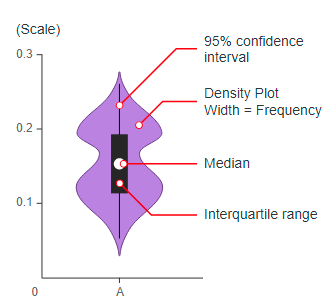

<ipython-input-8-10344be32235>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')


Text(0.5, 1.0, 'Car maker vs Price - Violin Plot')

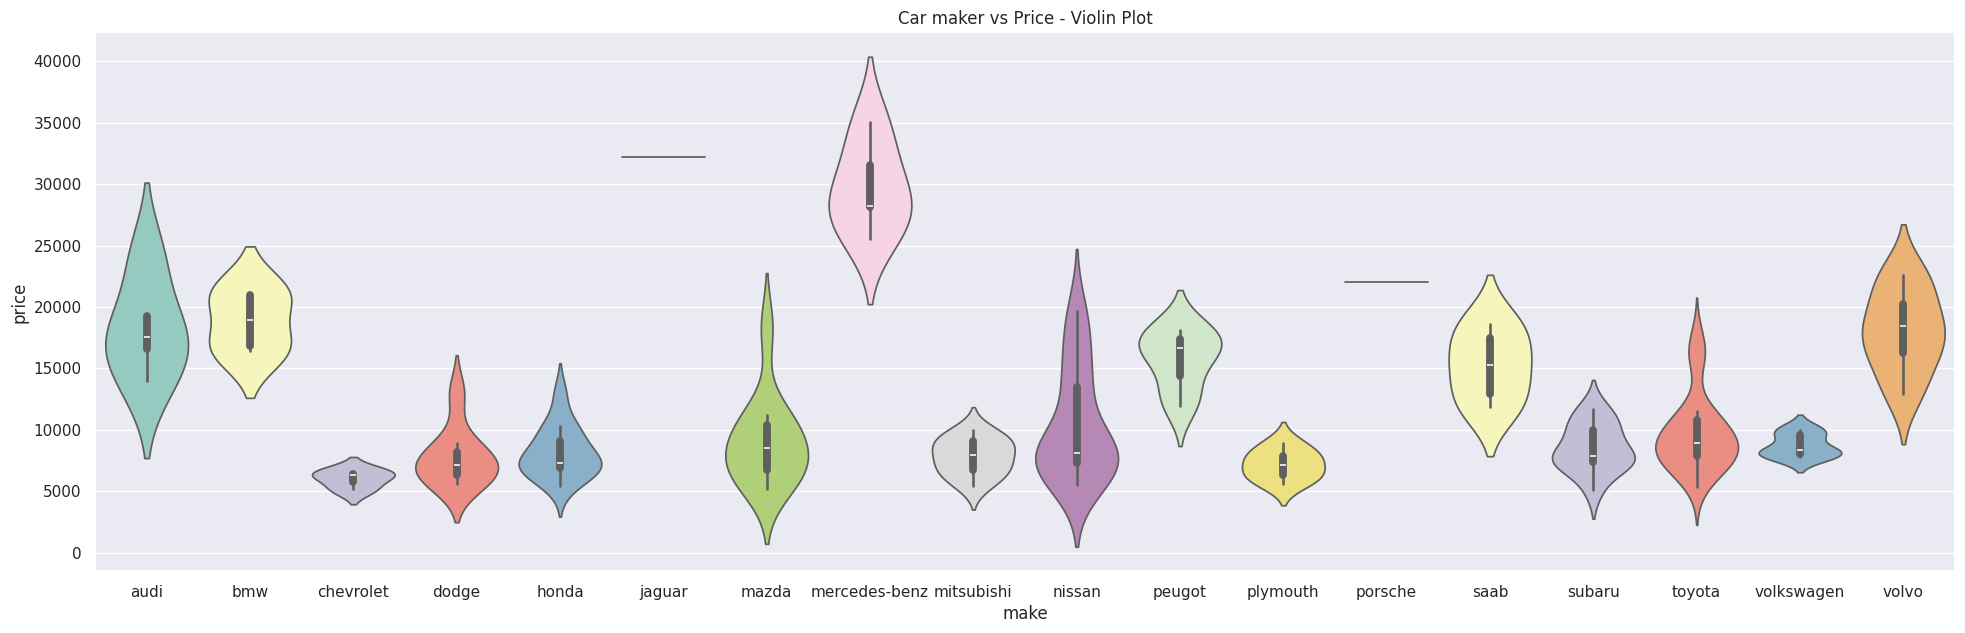

In [8]:
sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')

Another plot type are the Swarm Plots. They offer an alternate way of plotting the distribution of an attribute or the joint distribution of a couple of attributes. Unlike strip plots, swarm plots attempt to avoid obscuring points by calculating non-overlapping positions instead of adding random jitter. This sort of gives them appearance of a swarm of bees, or perhaps a honeycomb.

Text(0.5, 1.0, 'Car maker vs Price Swarm Plot')

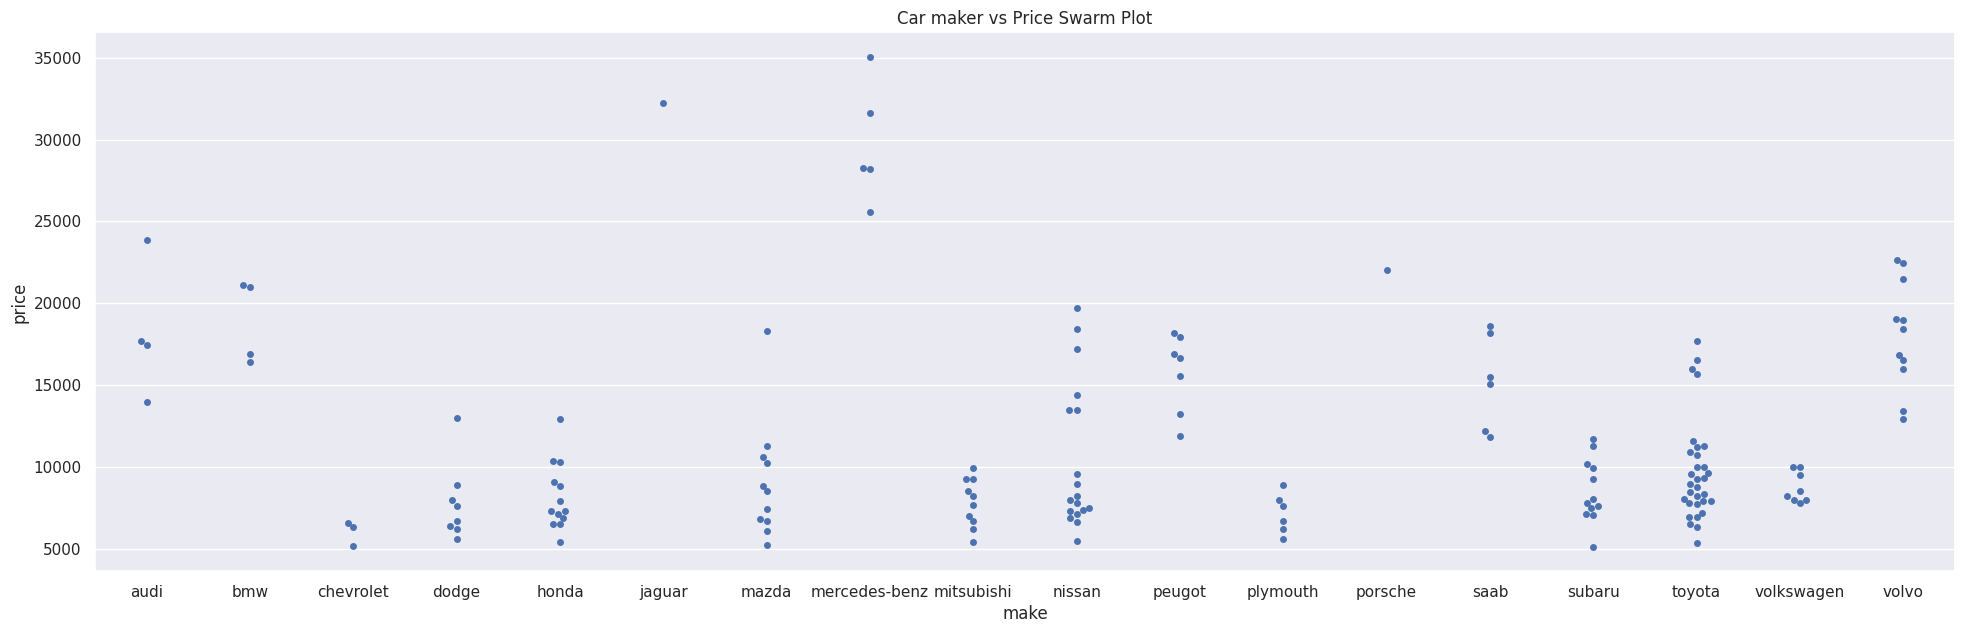

In [9]:
sns.swarmplot(x=X["make"],y=y).set_title('Car maker vs Price Swarm Plot')

Now let us try to learn a bit more about the various features in our dataset. One of the features is Horsepower, used to describe the power that an engine is capable of producing. A sensible assumption could be that Sport car companies like Porsche would have more cars with higher horsepowers. Lets check if this is actually true ...

<ipython-input-10-c71fe76854fb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car maker vs Horsepower Box Plot')


Text(0.5, 1.0, 'Car maker vs Horsepower Box Plot')

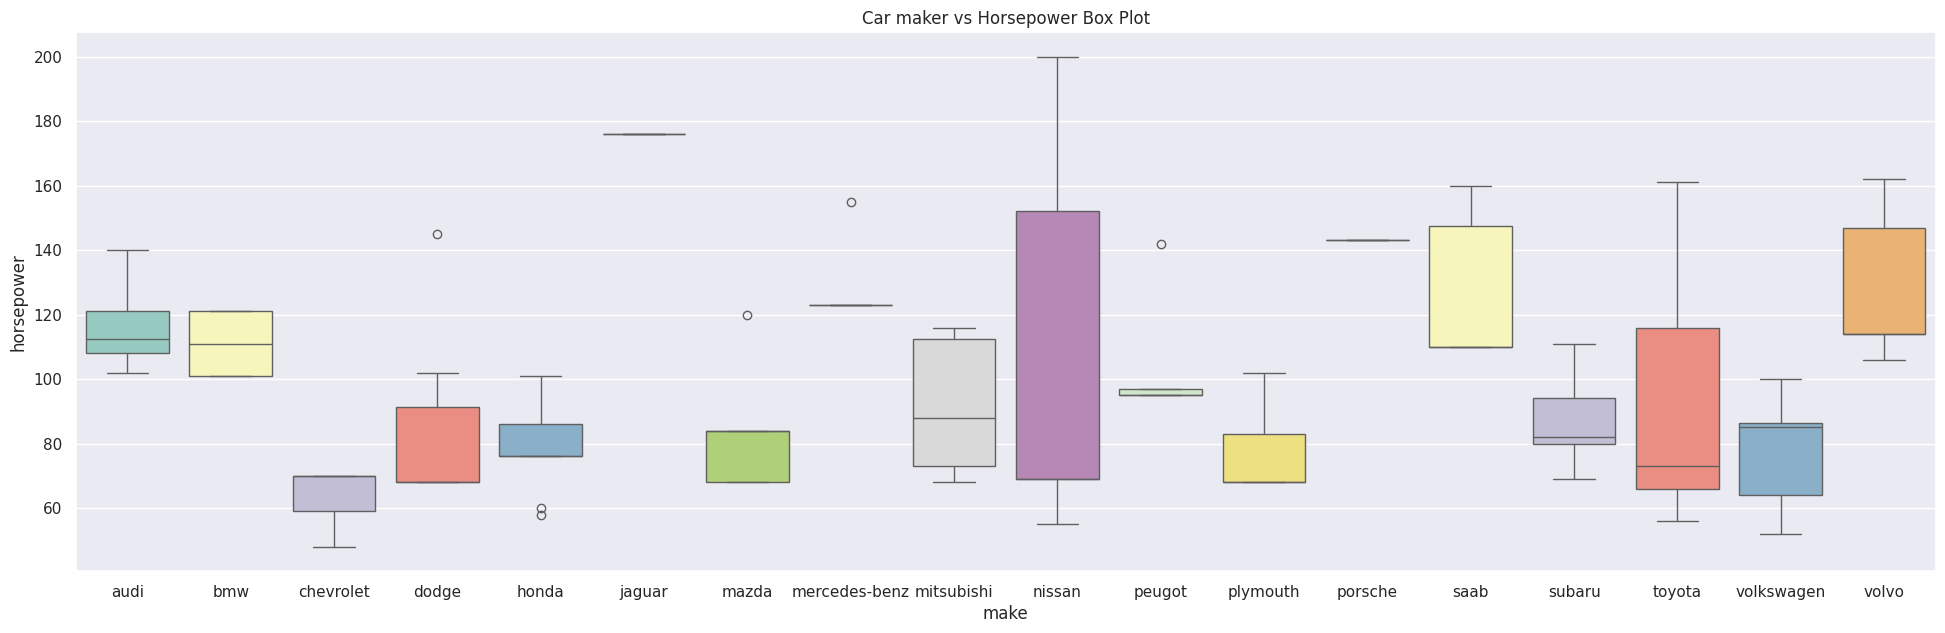

In [10]:
sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car maker vs Horsepower Box Plot')

As expected carmakers like Jaguar and Porsche have most of their cars with very high HP. A reasonable next step would be to see, if this new interesting feature has some correlation with our target variable "price".

A simple way to check this is to again plot a scatterplot (but this time lets do this using Seaborn instead of Matplotlib).

An expected positive correlation should show up with most of the points lying around a line with a positive slope.

<Axes: xlabel='horsepower', ylabel='price'>

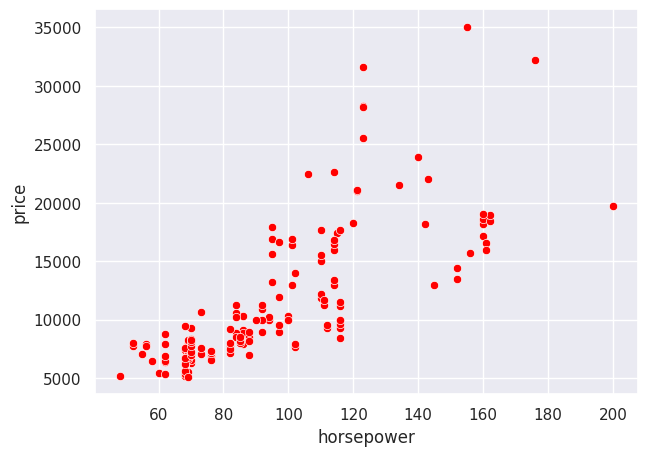

In [11]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y = y, color = "red")

A better way of plotting these correlations is using a Jointplot instead of a simple scatter plot. The jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.

I have also used the parameter "reg" which fits a regression line through the points making the correlation sign apparent. A line with positive slope would indicate a postiive correlation and vice versa. A line parallel to x-axis would indicate no correlation between the 2 variables (implying independence).

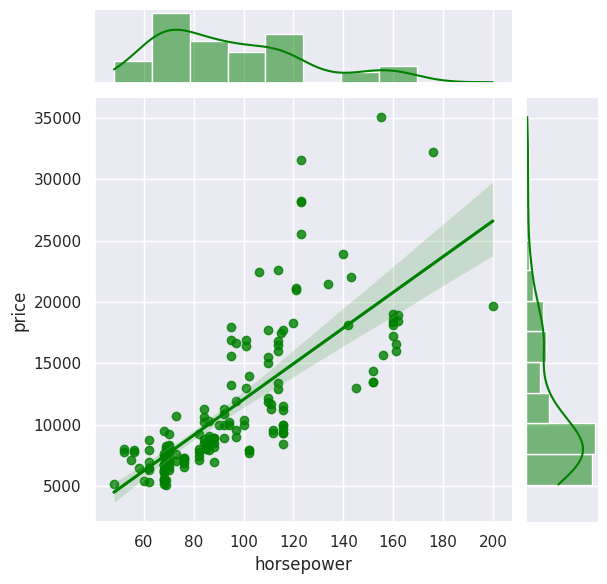

In [12]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y = y, kind="reg", color = 'green')

## Exercise: Plot the jointplot for a feature which has negative correlation with the target variable "price".

An example is shown below, with "highway-mpg" where MPG is miles per gallon.

### Hint: You should be using numeric features. The numeric features in the data are listed below:

'symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'

#### You are motivated to try all of these features to better understand the dataset

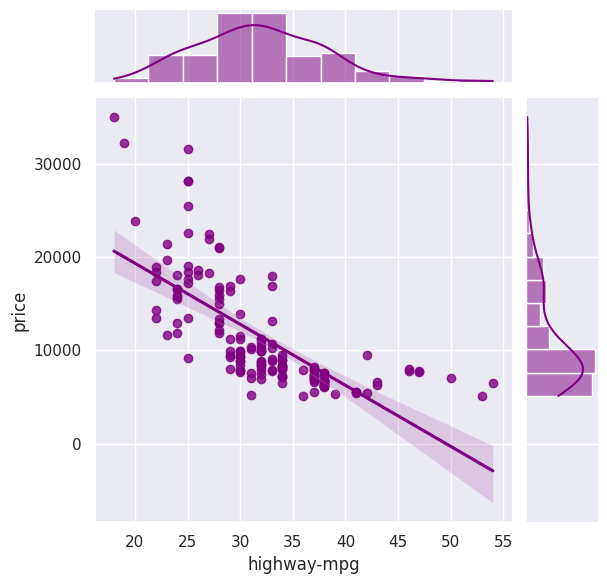

In [13]:
############################
### CHANGE THE CODE HERE ###

feature = "highway-mpg"

############################


sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

## Question: Interpret the plot below. List all the interpretations point by point using the plot below.

Some pointers:

1) Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?
When considering the "costliest" body type, it often depends on the context, such as health, fitness, or lifestyle choices. Here's a general breakdown:

1. **Ectomorph**: Typically lean and tall. They might find it costly in terms of nutrition, as they often need to consume more calories to gain weight or muscle.

2. **Mesomorph**: Naturally muscular and athletic. They generally have an easier time maintaining a healthy weight and building muscle, so they may have lower long-term costs in terms of health and fitness.

3. **Endomorph**: Usually rounder and bulkier. They might incur higher costs related to health risks (like diabetes or heart disease) and may require more effort in dieting and exercise to manage their weight.

In terms of overall costs associated with health and fitness management, the **endomorph** body type can be seen as the "costliest" due to potential health issues and the need for more intensive lifestyle management. However, it ultimately varies based on individual circumstances and lifestyle choices.
2)When considering the "costliest" body type, it often depends on the context, such as health, fitness, or lifestyle choices. Here's a general breakdown:
When considering which body type might be the "costliest," it’s essential to examine various factors, including health implications, lifestyle requirements, and fitness needs. Here’s a detailed breakdown of the three primary body types—ectomorph, mesomorph, and endomorph—focusing on their respective costs.

### Ectomorph

**Characteristics**: Ectomorphs are generally slim, with narrow shoulders and hips. They have a fast metabolism, which often makes it challenging for them to gain weight or muscle.

**Costs**:
- **Nutritional Needs**: Ectomorphs often require a significantly higher caloric intake to achieve their fitness goals. This can lead to higher grocery bills, as they need to consume more food, especially high-calorie and protein-rich items.
- **Supplements**: To help with muscle gain, ectomorphs may invest in protein powders, meal replacements, or weight gainers, contributing to additional expenses.
- **Fitness Regimen**: While they may not face many challenges related to weight loss, they might spend more on specialized training programs aimed at building muscle mass, which can be costly.

**Minimum Values**: Ectomorphs often have lower body fat percentages, which can translate to fewer health-related costs associated with obesity. However, the financial implications of their dietary and fitness requirements can still add up.

### Mesomorph

**Characteristics**: Mesomorphs typically have a muscular build with broad shoulders and a narrow waist. They can gain and lose weight relatively easily.

**Costs**:
- **Balanced Maintenance**: Mesomorphs often have an easier time maintaining a healthy weight, potentially leading to lower long-term health costs. They are generally able to balance diet and exercise effectively.
- **Fitness Investment**: While they may still invest in gym memberships or personal trainers, their overall expenses related to dieting and fitness may be lower compared to ectomorphs and endomorphs.
- **Health Risks**: Mesomorphs may not face as many weight-related health issues, which could reduce long-term medical costs.

### Endomorph

**Characteristics**: Endomorphs usually have a rounder, bulkier physique with a higher percentage of body fat. They can gain weight easily but often find it challenging to lose it.

**Costs**:
- **Dietary Management**: Endomorphs often need to be more careful with their diets to avoid weight gain, which can mean investing in healthier food options and potentially expensive meal plans or weight-loss programs.
- **Health Implications**: They may face higher health risks associated with obesity, such as diabetes, heart disease, or joint issues. This can lead to increased medical expenses over time, including medications and treatments.
- **Fitness Requirements**: To maintain a healthy weight, endomorphs might need to invest in more intensive workout regimes, personal training, or specialized fitness programs, which can further add to their costs.

**Minimum Values**: While endomorphs may incur higher costs in health and fitness management, those who are proactive about their health might mitigate some expenses through consistent exercise and a healthy diet.

### Conclusion

In terms of overall costs associated with health, fitness, and lifestyle management, the **endomorph** body type can be considered the "costliest." This is primarily due to the potential health risks and the need for more intensive dietary and exercise management. However, it’s important to note that individual circumstances, lifestyle choices, and personal health management can significantly influence these costs for each body type.


3) Do you think the body-style of a car can be a good predictor for its price?
Yes, the body style of a car can be a good predictor of its price, but it's one of several factors that influence pricing. Here’s how body style relates to cost:

### 1. **Body Style Types**:
   - **Sedans**: Generally more affordable and practical, but higher-end models can still fetch a premium.
   - **SUVs/Crossovers**: Typically more expensive due to their size, versatility, and demand. They often come with higher features and capabilities.
   - **Coupes**: Sporty designs can lead to higher prices, especially for performance models.
   - **Convertibles**: Often priced higher due to their luxury appeal and unique features.
   - **Trucks**: Pickup trucks can be pricey, particularly for larger models with advanced capabilities.

### 2. **Market Demand**:
   - Popular body styles, like SUVs and trucks, usually command higher prices due to consumer preference. This demand can inflate prices, especially for new models.

### 3. **Functionality and Features**:
   - Body styles that offer more utility (like SUVs and trucks) often come with features that add to the cost, such as all-wheel drive, towing capacities, and advanced safety features.

### 4. **Brand and Model**:
   - Certain brands and models within each body style can significantly affect price. Luxury brands or high-performance models will typically be priced higher regardless of body style.

### 5. **Market Trends**:
   - Trends in consumer preferences can shift prices over time. For example, if electric SUVs become more popular, prices for these models may rise due to demand.

### Conclusion
While body style is a strong indicator of a car's price, it's essential to consider other factors like brand, features, condition, and market demand for a comprehensive understanding of pricing.

<ipython-input-14-5739ed01973b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')


Text(0.5, 1.0, 'Body style vs Price Box Plot')

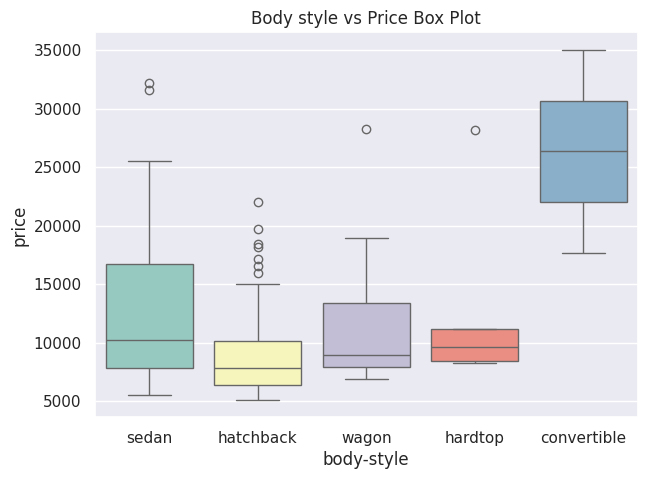

In [14]:
sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')

# 1. Plotting multiple plots together: Search for information about plt.subplots(). Choose any 2 plot types from the ones discussed above and plot them together in a single figure using subplots.?

To plot multiple plots together, you can use the plt.subplots() function from Matplotlib. This function creates a figure and a grid of subplots with a single call, providing reasonable control over how the individual plots are created.



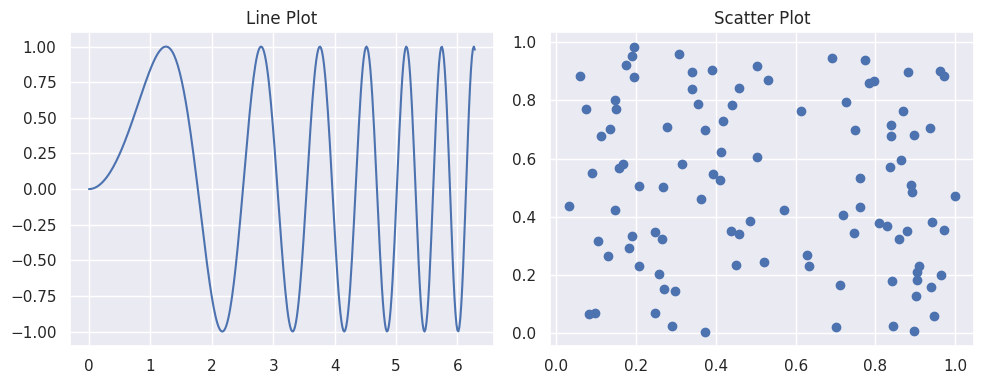

In [15]:
#Let's say we want to plot a line plot and a scatter plot together in a single figure. Here's how you can do it:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Create a line plot on the first subplot
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)
axs[0].plot(x, y)
axs[0].set_title('Line Plot')

# Create a scatter plot on the second subplot
x = np.random.rand(100)
y = np.random.rand(100)
axs[1].scatter(x, y)
axs[1].set_title('Scatter Plot')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

This code will create a figure with two subplots, one for the line plot and one for the scatter plot. The plt.subplots() function is used to create the figure and the subplots, and the axs variable is a 1D array of Axes objects, which can be used to customize the individual plots.

#2.  Go through the Seaborn documentation and find a plot type that has not been demonstrated in the examples above. Use this new plot type to represent the above data in a meaningful way.

Seaborn is a Python data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics. It offers various plot types for data representation, including categorical plots, relational plots, and regression plots.

One of the new plot types that has not been demonstrated above is the stripplot. A stripplot is a categorical plot that shows the distribution of a variable along a categorical axis. It is similar to a swarmplot, but it does not adjust the position of the points on the categorical axis.

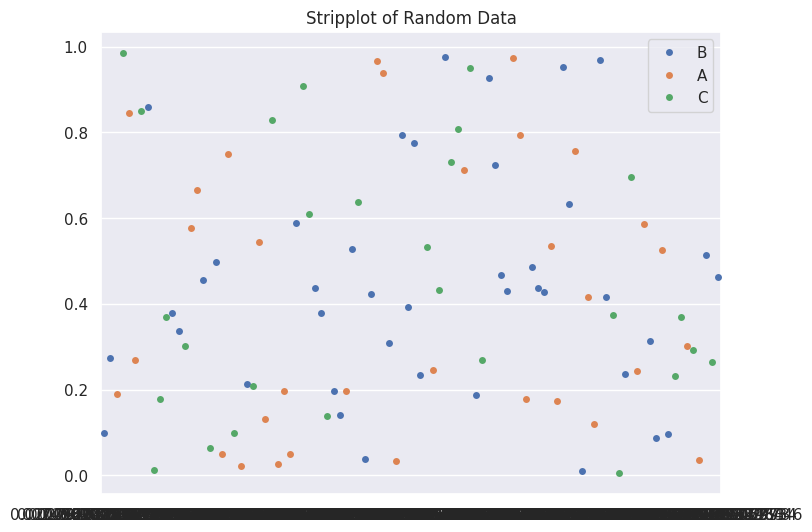

In [16]:
#Here's how you can use a stripplot to represent the above data in a meaningful way:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
x = np.random.rand(100)
y = np.random.rand(100)
category = np.random.choice(['A', 'B', 'C'], 100)

# Create a stripplot
plt.figure(figsize=(8, 6))
sns.stripplot(x=x, y=y, hue=category)
plt.title('Stripplot of Random Data')
plt.show()

This code will create a stripplot with the x-axis representing the continuous variable, the y-axis representing the continuous variable, and the hue representing the categorical variable. The stripplot will show the distribution of the continuous variables along the categorical axis, providing a meaningful way to visualize the data.

Some interesting references:


1) https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

2) https://towardsdatascience.com/data-visualization-for-machine-learning-and-data-science-a45178970be7


3) https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2






